### Data science nano degree project 1 

<b><u>business questions to answer :</u></b>

What are the most popular listings ?<br>
what attributes effect popularity most ?<br>
are popularity and reviews related ?<br>
can we predict price inorder to give customers an expected price for there requests?


In [3]:
#loading necessary packages 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

### Loading the data and data understanding

In [4]:
#loading the data for the boston Airbnb 
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

data = [calendar, listings, reviews]

In [5]:
def explore_data(df):
    '''This function takes a data frame and prints the head, Info and descrtiption of the data frame'''
    print(df.head())
    print(df.info())
    print(df.describe())


In [6]:
explore_data(listings)

         id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a 

In [7]:
explore_data(calendar)

   listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB
None
         listing_id
count  1.308890e+06
mean   8.442118e+06
std    4.500149e+06
min    3.353000e+03
25%    4.679319e+06
50%    8.578710e+06
75%    1.279603e+07
max    1.493346e+07


In [8]:
explore_data(reviews)

   listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 

#### Data preparation 

- remove duplications and missing values 
- choose relevant features for analysis from the listings data frame
- makes sure all data types are correct 

In [308]:
# cleaning the lstongs data frame
#firstly by choosing the relevant features 

listings = listings[['id','host_id','host_response_time','host_response_rate','host_listings_count','host_acceptance_rate','property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'price', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]
listings.head()

,id,host_id,host_response_time,host_response_rate,host_listings_count,host_acceptance_rate,property_type,room_type,accommodates,bathrooms,...,bed_type,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,12147973,31303940,NaN,NaN,1,NaN,House,Entire home/apt,4,1.5,...,Real Bed,$250.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,2572247,within an hour,100%,1,100%,Apartment,Private room,2,1.0,...,Real Bed,$65.00,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,6976,16701,within a few hours,100%,1,88%,Apartment,Private room,2,1.0,...,Real Bed,$65.00,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0
3,1436513,6031442,within a few hours,100%,1,50%,House,Private room,4,1.0,...,Real Bed,$75.00,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0
4,7651065,15396970,within an hour,100%,1,100%,House,Private room,2,1.5,...,Real Bed,$79.00,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0


columns where chosen based on the relevance they are to the questions proposed and the amount of missing values they have for example I excluded the square feet column due to it having over 90% missing values  

In [313]:
#removing duplicates and removing nulls
listings = listings.dropna().drop_duplicates()

#cleaning columns and changing there data types
listings['host_response_rate'] = listings['host_response_rate'].str.strip('%').astype(int)
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.strip('%').astype(int)
listings['price'] = listings['price'].str.strip('$')
listings['price'] = listings['price'].replace(",",'',regex=True)
listings['price'] = listings['price'].astype(float)

In [320]:
#making the occupied column to calculate the occupancy rate easier
calendar['occupied'] = calendar['available'].apply(lambda x: 1 if x == 'f' else 0)

#finding the occupancy rate of each listing as a metric for popularity
occupancy = calendar.groupby('listing_id').agg({'occupied': 'mean'}).reset_index()

answering question 1:

What are the most popular listings ?<br>


In [389]:
occupancy.sort_values('occupied', ascending = False).head(10)

,listing_id,occupied
1792,8577620,1.0
909,4759640,1.0
913,4787213,1.0
916,4792901,1.0
920,4823089,1.0
2394,11569156,1.0
2392,11553697,1.0
2390,11528125,1.0
2387,11512755,1.0
928,4870883,1.0


answering question 2:

what attributes effect popularity most ?<br>

In [326]:
#merging the data frames 
listings = listings.merge(occupancy, how = 'left',left_on = 'id', right_on = 'listing_id' )
listings.head()

,id,host_id,host_response_time,host_response_rate,host_listings_count,host_acceptance_rate,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,"(listing_id, )","(occupied, sum)","(occupied, mean)",listing_id,occupied
0,3075044,2572247,within an hour,100,1,100,Apartment,Private room,2,1.0,...,9.0,10.0,10.0,9.0,9.0,3075044,6,0.016438,3075044,0.016438
1,6976,16701,within a few hours,100,1,88,Apartment,Private room,2,1.0,...,9.0,10.0,10.0,9.0,10.0,6976,46,0.126027,6976,0.126027
2,1436513,6031442,within a few hours,100,1,50,House,Private room,4,1.0,...,10.0,10.0,10.0,10.0,10.0,1436513,267,0.731507,1436513,0.731507
3,7651065,15396970,within an hour,100,1,100,House,Private room,2,1.5,...,10.0,10.0,10.0,9.0,10.0,7651065,31,0.084932,7651065,0.084932
4,12386020,64200298,within a few hours,100,2,95,Condominium,Private room,2,1.0,...,10.0,10.0,10.0,9.0,10.0,12386020,307,0.841096,12386020,0.841096


In [361]:
#changing categorical variables to numercal using dummies
dummies = pd.get_dummies(listings[['host_response_time', 'property_type', 'room_type', 'bed_type']])

#getting all the numerical features in one data frame to compare them 
numeric = listings[['host_response_rate','host_listings_count', 'host_acceptance_rate','accommodates', 
          'bathrooms', 'bedrooms', 'beds','price', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','occupied']]

all_data = pd.concat([numeric,dummies],axis=1)

<AxesSubplot:>

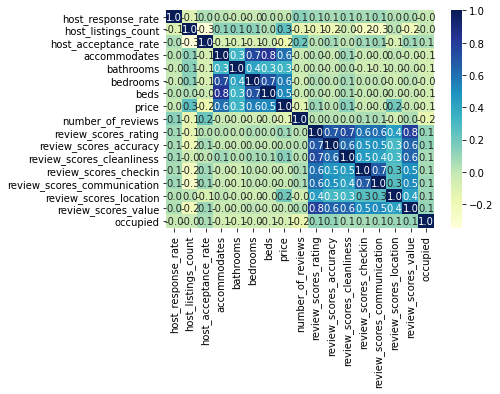

In [338]:
sns.heatmap(numeric.corr(),cmap="YlGnBu", annot=True, fmt = '.1f')

From the heatmap above we can visualise the correllation beteween the occuppied feature and the other feature. to answer question two there are features that significantly change the occupied rate but ones with the highest effect are number of reviews wich has a negative correllation to popularity meening that the more reviews the less popular is the listing probably due to the majority of reviews being negative people tend to right reviews more when they are negative reviews. One of the most surprising results as well is that host response time has no effect on the popularity of there listing they can have the slowest response times and still be the most popular listing in the city 

answering question 3:

what attributes effect popularity most ?<br>

we can answer question 3 from the correllation matrix as well with it showing that the review scores do have a positive effect on popularity but the effect is not very sttrong meaning that it is a contibuting factor but is not the only one.

answering question 4:

can we predict price inorder to give customers an expected price for there requests?

In [339]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [340]:
numeric.columns

Index(['host_response_rate', 'host_listings_count', 'host_acceptance_rate',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'occupied'],
      dtype='object')

In [357]:
#splitting the target and predictor variables 
X = numeric[['host_listings_count', 'host_acceptance_rate','accommodates', 'bathrooms', 'bedrooms', 'beds','number_of_reviews', 'review_scores_rating',
       'review_scores_rating', 'review_scores_cleanliness', 'review_scores_location', 'occupied',]]
y = numeric['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train) 
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r squared of the simple linear model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r squared of the simple linear model was 0.5006716986771265 on 756 values.'

The model only scored and R squared value of 0.5 meaning that the model explains 50% of the variance in the target variable

<AxesSubplot:>

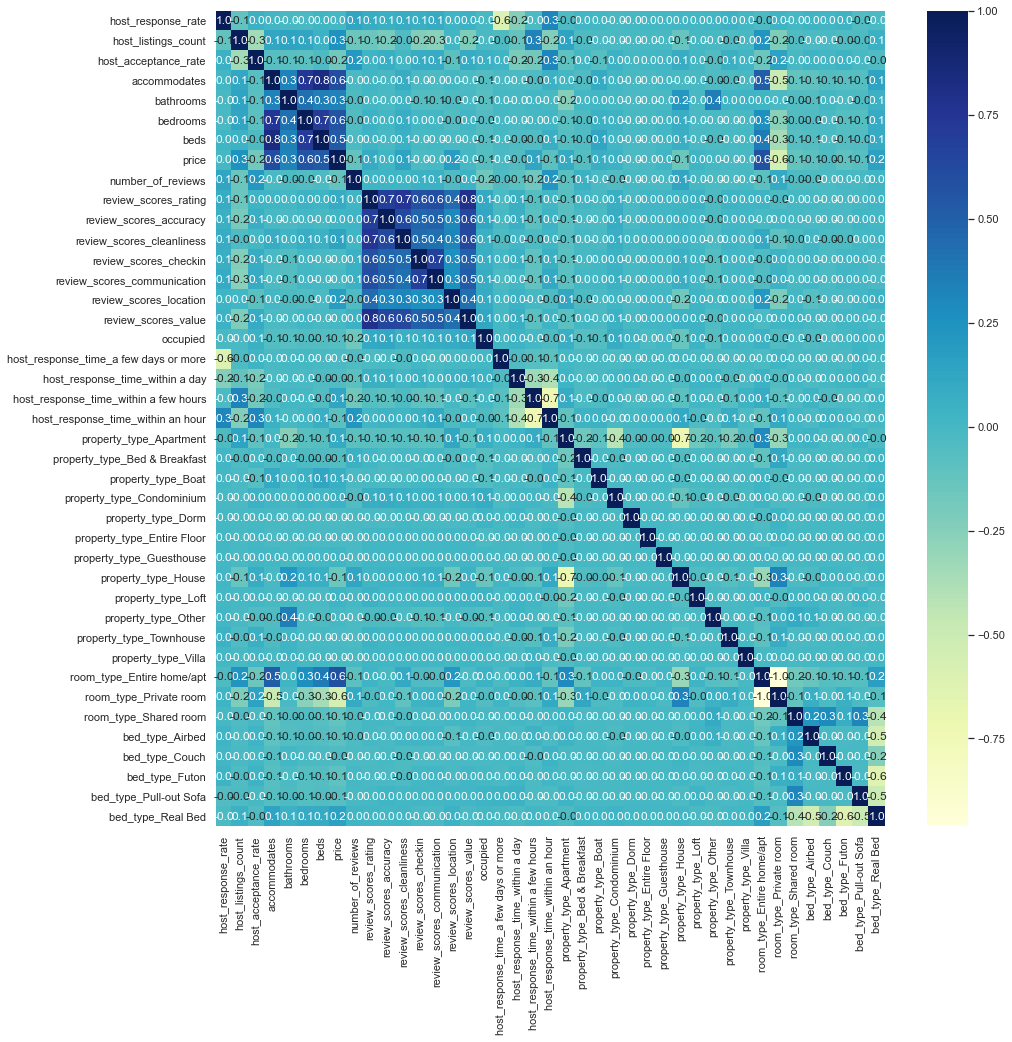

In [370]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(all_data.corr(),cmap="YlGnBu", annot=True, fmt = '.1f')

In [371]:
#splitting the target and predictor variables 
X = all_data[['host_response_rate', 'host_listings_count', 'host_acceptance_rate',
       'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'occupied',
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Entire Floor', 'property_type_Guesthouse',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Townhouse',
       'room_type_Entire home/apt',
       'room_type_Shared room', 'bed_type_Airbed', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa']]
y = all_data['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train) 
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r squared of the simple linear model using categorical and numerical data was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r squared of the simple linear model using categorical and numerical data was 0.6193352364892095 on 756 values.'

The model was successful in explaining 62% of the variations in the price variable and I think if we give clients a price range based on this model rather than a specific price the suggestion will be jeust as useful.

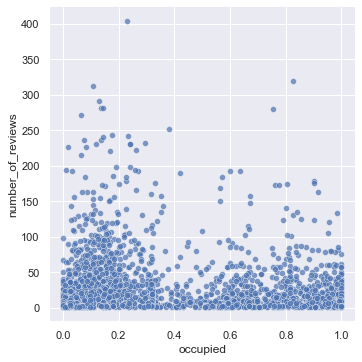

In [383]:
#visualusing the answer to question two on relation between occupancy and number of reviews
sns.relplot(data = listings, x = "occupied", y = "number_of_reviews", alpha = 0.7)

### Key Insights and Findings:

- we found the top ten most popular listings and further analysis to why there occupanvy rate is high can prove beneficial further more we can give them benefits in order to insetivise other hosts 
- not one feature alone effects the occupancy rate, It's a combination of all features of the listing but one of the most correllated features was review number and that could be due to the fact that since reviews tend to be negative the more reviews the more negative rep the listings get
- good reviews definetley increase popularity but they don't have the biggest efect meaning that alot of other factors play a role in popularity of listing  
- prices can be modelled by the listings feature to a certain degree of accuracy and the feature itself can be helpful for users looking for certain listings to expect a price range 